# Module 3: Classification

In Module 1, we learned that the most common supervised learning tasks are ___regression___ (predicting values) and ___classification___ (predicting classes). In module 2 we explored a regression task, predicting housing values, using various algorithms such as Linear Regression, Decision Trees, and Random Forests. Now we will turn our attention to ___classification systems___.

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST Dataset

"MNIST" in the MNIST dataset stands for Modified National Institute of Standards and Technology.  The MNIST dataset contains images of handwritten digits collected from Census Bureau employees and highschool students. The first 60,000 examples of the data set form the training data set, and the last 10,000 examples form the testing data set.  More information can be found [here](http://yann.lecun.com/exdb/mnist/) and [here](https://en.wikipedia.org/wiki/MNIST_database).

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

Datasets loaded by Scikit-Learn generally have a similar dictionary structure.  We can view the keys of the dictionary using the following:

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Let's take a closer look at the entities we are working with.  More information from about the n-dimensional array called ndarray can be found [here](https://numpy.org/doc/stable/reference/arrays.ndarray.html#:~:text=An%20ndarray%20is%20a%20(usually,the%20sizes%20of%20each%20dimension.))

In [5]:
y.shape

(70000,)

In [6]:
# Each image is a 28 pixels x 28 pixels. 
28 * 28

784

In [7]:
some_digit = X[0]
print(some_digit)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Saving figure some_digit_plot


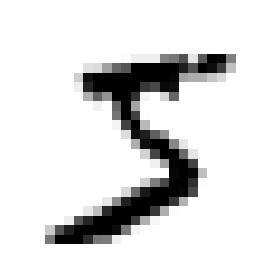

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [9]:
y[0]

'5'

In [10]:
y = y.astype(np.uint8)

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [12]:
# For plotting multiple images
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


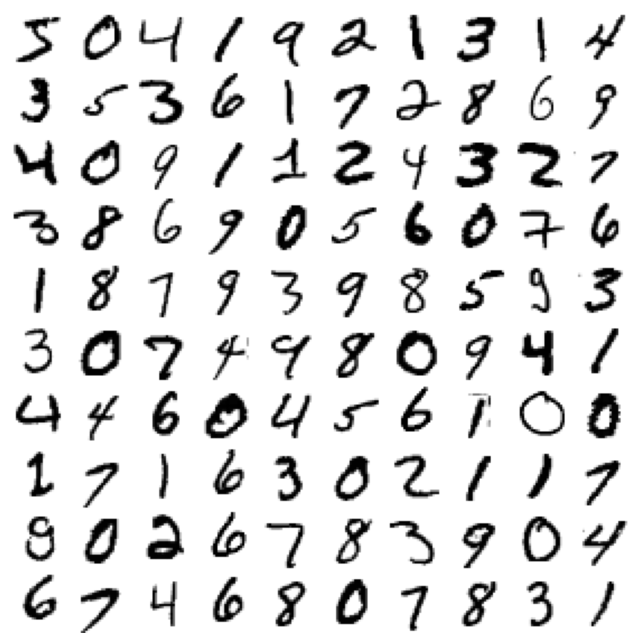

In [13]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [14]:
y[0]

5

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary classifier

Let's train a model that is a “5-detector”, which is a binary classifier that is capable of
distinguishing between just two classes, 5 and not-5.

In [19]:
# True for all 5s, False for all other digits 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Click for more information about [Stochastic Gradient Descent Classifiers and Regressors](https://scikit-learn.org/stable/modules/sgd.html#sgd).

SGD is an optimization technique, and does not correspond to a specific family of machine learning models. It is only a way to train a model. For example, `SGDClassifier(loss='log')` is equivalent to `LogisticRegression` that is fitted via SGD. `SGDRegressor(loss='squared_loss', penalty='l2')` is equivalent to `Ridge` that is fitted via SGD.

We are using many of the default values.  We use the default loss function, which is 'hinge' and implies that a linear SVM will be used.  The default penalty, or regularization term used is 'L2', which is the standard regularizer for linear SVM models.

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor.

## Measuring Accuracy Using Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
# above 95% for all 3 cross validations

array([0.95035, 0.96035, 0.9604 ])

Before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. 

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with ___skewed (or imbalanced) datasets___ (i.e., when some
classes are much more frequent than others).

## Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the [confusion
matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  Let's start by getting predictions from our model.

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Wait, how does cross_val_predict() make a prediction?

![KFoldCrossValidation.png](Figures/KFoldCrossValidation.PNG)

In [27]:
y_train_pred
# an array of predictions for the corresponding features
# these are saying weather it is a 5 or it's not a 5 

array([ True, False, False, ...,  True, False, False])

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

### passing what our true labels are and what predicted labels are


array([[53892,   687],
       [ 1891,  3530]])

In [29]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Let's plot the confusion matrix again using the plot_confusion_matrix() method:

Confusion matrix, without normalization
[[52316  2263]
 [  601  4820]]


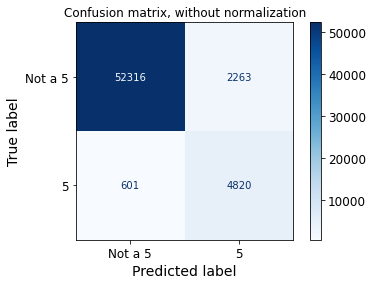

Normalized confusion matrix
[[0.96 0.04]
 [0.11 0.89]]


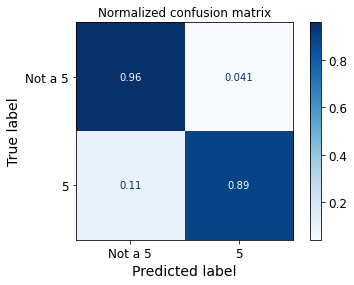

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# formatting
np.set_printoptions(precision=2)

# Plot Options for Confusion Matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(sgd_clf, X_train, y_train_5,
                                 display_labels=["Not a 5", "5"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

Let's take a slightly different look at this Confusion Matrix:

![confusionMatrixExample](Figures/confusionMatrixExample.PNG)

## Accuracy and Error Rate

When testing a classifier on an example whose real class is known, we can encounter only the following four different outcomes:

 - ___True Positive___: the example is positive and the classifier correctly recognizes it as such
 - ___True Negative___: the example is negative and the classifier correctly recognizes it as such
 - ___False Negative___: the example is positive, but the classifier labels it as negative
 - ___False Positive___: the example is negative, but the classifier labels it as positive

A classifier's ___error rate (E)___ is the frequency of errors made by the classifier over a given set of examples:

$$ E = \frac{N_{FP} + N_{FN}}{N_{FP}+N_{FN}+N_{TP}+N_{TN}} $$

A classifier's ___accuracy (Acc)___ is the frequency of correct classifications made by the classifier over a given set of examples:

$$ Acc = 1 - E = \frac{N_{TP} + N_{TN}}{N_{FP}+N_{FN}+N_{TP}+N_{TN}} $$

In the case of binary classification problems, by convention, data scientists assign the class with fewer instances to be the "positive" class, and identify it with unity, or 1. Further, the class with more instances is considered to be the "negative" class, and it is identified by 0. 

## Precision and Recall

In some applications, negative examples far outnumber positive examples by a wide margin - this is what we call a ___class imbalance___.  When this happens, error rate and accuracy offer a misleading picture of classification performance.

$$ precision= Pr = \frac{TP}{TP+FP} $$

where TP is the number of true positives, and FP is the number of false positives

$$ recall = Re = \frac{TP}{TP+FN} $$

where TP is the number of true positives, FN is the number of false negatives.

$$ F_{\beta} = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

where $\beta$ is the number of times that recall is considered to be more important than precision.  If precision and recall are equally as important, than we have $F_1$ that is the ___harmonic mean___ of precision and recall. 

$$ F_{1} = 2 \cdot \frac{Pr \cdot Re}{Pr + Re} $$

Let's calculate these metrics below.  First, lets remind ourselves of the confusion matrix values:

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Using the [precision_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) method:

In [32]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)
# when we said that something was a 5, we were only right 84% of the time 

0.8370879772350012

In [33]:
3530 / (3530 + 687)

0.8370879772350012

Using the [recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) method:

In [34]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [35]:
3530 / (3530 + 1891)

0.6511713705958311

Using the [f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) method:


In [36]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
3530 / (3530 + (687 + 1891) / 2)

### Precision/Recall Trade-Off

If someone says to you, “Let’s reach 99% precision,” you should ask, “At what recall?”

![precisionRecallTradeOff](Figures/precisionRecallTradeOff.PNG)

The [decision_function method](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) returns scores returned through evaluation by the decision fucntion.

In [37]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22])

In [38]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [39]:
y_some_digit_pred

array([ True])

In [40]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Now let's use the [cross_val_predict method]() to get scores for each instances in the training set:

In [41]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

The [precision_recall_curve() method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) computes precision-recall pairs for different probability thresholds:

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


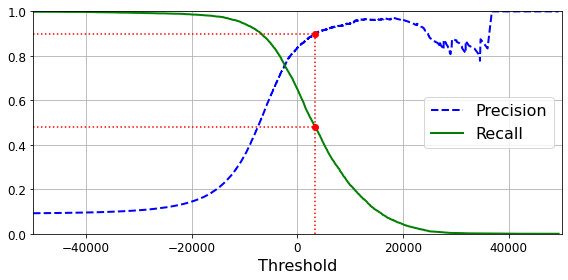

In [43]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [44]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


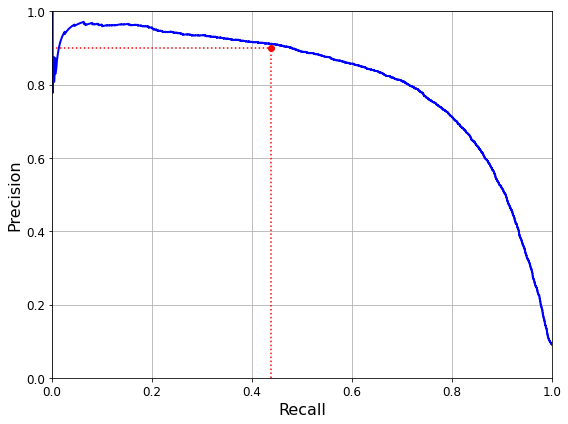

In [45]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [46]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [47]:
threshold_90_precision

3370.0194991439557

In [48]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_score(y_train_5, y_train_pred_90)

# ROC Curves

The ___receiver operating characteristic (ROC) curve___ plots the ___true positive rate___ (another name for recall) against the ___false positive rate (FPR)___. The FPR is the ratio of negative instances that are incorrectly classified as positive.  

Scikit-Learn provides the [roc_curve() method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) for binary classification tasks to compute the ROC:

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


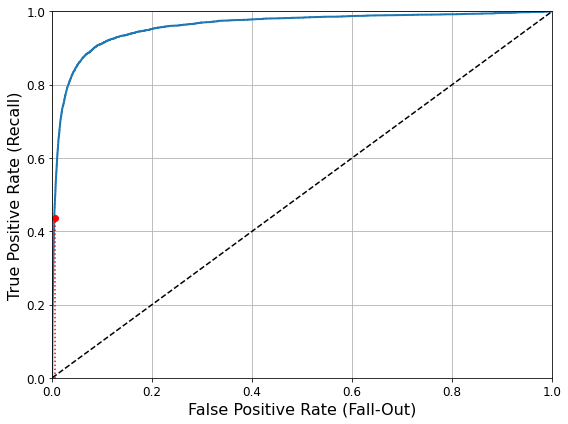

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier. 

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [54]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


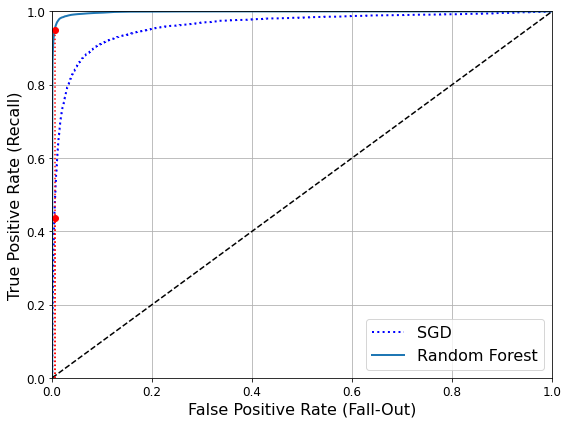

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [57]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

# Multiclass Classification

___Binary classifiers___ distinguish only between two classes, however ___multiclass classifiers___ (also called ___multinomial classifiers___) can distinguish between more than two classes.

Two strategies that allow for multiclass classification using multiple binary classifiers are called:

 - ___one-versus-the-rest (OvR)___
 - ___one-versus-one (OvO)___

Let's use a [Support Vector Classifier (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to try building a classifier that can distinguish between all 10 classes!

In [63]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
# y_train, not y_train_5
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [59]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.82,  7.09,  3.83,  0.79,  5.89,  9.3 ,  1.8 ,  8.1 , -0.23,
         4.84]])

In [60]:
np.argmax(some_digit_scores)

5

In [61]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
svm_clf.classes_[5]

5

Also known as one-vs-all, the [One-vs-the-rest (OvR) multiclass/multilabel strategy](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) consists in fitting one classifier per class.

In [65]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [66]:
len(ovr_clf.estimators_)

10

In [67]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [68]:
sgd_clf.decision_function([some_digit])

array([[-31893.03, -34419.69,  -9530.64,   1823.73, -22320.15,  -1385.8 ,
        -26188.91, -16147.51,  -4604.35, -12050.77]])

In [70]:
cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.85, 0.81, 0.84])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.85, 0.82, 0.86])

# Error Analysis

We now will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

In [75]:
intances = 5000

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled[:intances], y_train[:intances], cv=3)
conf_mx = confusion_matrix(y_train[:intances], y_train_pred[:intances])
conf_mx

array([[460,   0,   3,   2,   2,   7,   3,   0,   2,   0],
       [  0, 535,   5,   2,   1,   5,   0,   1,  13,   1],
       [  4,  11, 410,  14,  14,   4,  10,   6,  15,   0],
       [  2,   4,  18, 405,   0,  34,   1,  12,  12,   5],
       [  3,   1,   7,   2, 483,   0,   6,   2,  11,  20],
       [  6,   5,   3,  18,   9, 352,   9,   1,  20,  11],
       [  4,   4,   9,   0,   6,  10, 463,   0,   5,   0],
       [  3,   3,   3,   4,   9,   0,   0, 495,   1,  32],
       [  1,  16,  13,  16,   2,   8,   9,   5, 384,   8],
       [  6,   4,   5,   6,  19,   5,   0,  25,   6, 419]])

In [76]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


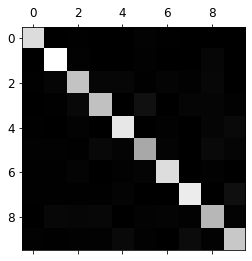

In [77]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [78]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


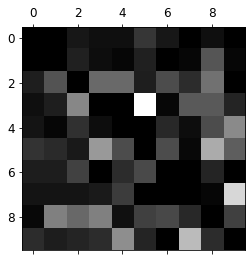

In [79]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


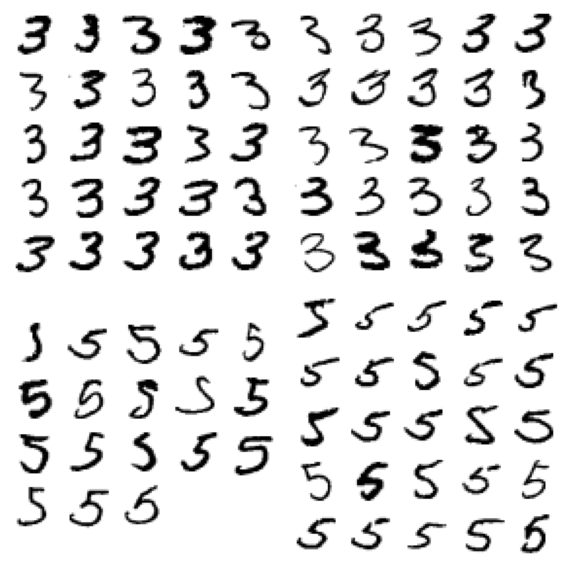

In [83]:
cl_a, cl_b = 3, 5

X_temp = X_train[:intances].copy()

X_aa = X_temp[(y_train[:intances] == cl_a) & (y_train_pred == cl_a)]
X_ab = X_temp[(y_train[:intances] == cl_a) & (y_train_pred == cl_b)]
X_ba = X_temp[(y_train[:intances] == cl_b) & (y_train_pred == cl_a)]
X_bb = X_temp[(y_train[:intances] == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

Confusion matrix, without normalization
[[262   0   1   4   0  12   0   0   6   0]
 [  0 322   1   4   0   0   0   1  11   0]
 [  0   3 241  18   3   4   1   4  24   1]
 [  0   0   4 276   1   4   0   3   5   2]
 [  1   2   3   1 274   0   1   1  18  24]
 [  0   0   5  30   1 199   4   0  32   3]
 [  2   0   2   1   3   4 283   0  11   0]
 [  0   0   3   5   2   1   0 303   4  11]
 [  1   2   0   8   0  11   0   0 238   1]
 [  0   0   0   8   0   2   0   6  14 257]]


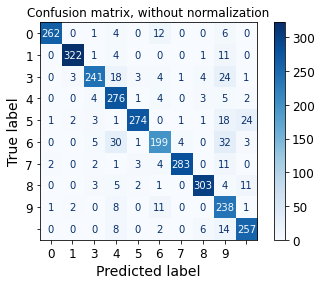

Normalized confusion matrix
[[0.9 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.1 0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.8 0.  0.  0.  0.1 0.1]
 [0.  0.  0.  0.1 0.  0.7 0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.9 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.9 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9]]


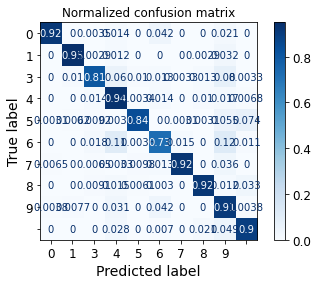

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# formatting
np.set_printoptions(precision=1)

# Plot Options for Confusion Matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(sgd_clf, X_train[:3000], y_train[:3000],
                                 display_labels=[0, 1, 3, 4, 5, 6, 7, 8, 9],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.show()   

# Multilabel Classification

A classification system that outputs multiple binary tags is called a ___multilabel classification system___.


Let's take a look at a [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):


Here is a refresher on [modular arithmetic](https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/what-is-modular-arithmetic) if you need one. 

In [85]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1) #odd numbers only 
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [86]:
knn_clf.predict([some_digit])
#predicting that 5 is not large and is odd

array([[False,  True]])

In [87]:
y_train_5

array([ True, False, False, ...,  True, False, False])

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multioutput Classification

The last type of classification task we are going to discuss here is called ___multioutput–multiclass classification___ (or simply ___multioutput classification___). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

We will use numpy's [randint()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html) function to generate some random numbers.

In [2]:
import numpy as np
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise


y_train_mod = X_train
y_test_mod = X_test

NameError: name 'X_train' is not defined

In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")